# Steals and Blocks Scatterplot

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Load file
players_data_loading = Path("Player Stats Per Game By Season.csv")
champions_data_loading = Path("Revised NBA Champions.csv")


# Read file
players_data = pd.read_csv(players_data_loading)
champions_data = pd.read_csv(champions_data_loading)


# Show file

players_data.head()

,Unnamed: 0,Player Name,Team(abv.),Games Played,Minutes Played Per Game,Field Goals Per Game,Field Goal Attempts Per Game,Field Goal Percentage,3-Point Field Goals Per Game,3-Point Field Goal Attempts Per Game,...,Offensive Rebounds Per Game,Defensive Rebounds Per Game,Total Rebounds Per Game,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,Personal Fouls Per Game,Points Per Game,Season Year
0,0,Tariq Abdul-Wahad,TOT,61,25.9,4.5,10.6,0.424,0.0,0.4,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,1999-2000
1,1,Tariq Abdul-Wahad,ORL,46,26.2,4.8,11.2,0.433,0.0,0.5,...,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,1999-2000
2,2,Tariq Abdul-Wahad,DEN,15,24.9,3.4,8.7,0.389,0.1,0.1,...,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,1999-2000
3,3,Shareef Abdur-Rahim,VAN,82,39.3,7.2,15.6,0.465,0.4,1.2,...,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3,1999-2000
4,4,Cory Alexander,DEN,29,11.3,1.0,3.4,0.286,0.3,1.2,...,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8,1999-2000


In [66]:
# Drop the unnamed column and the league column.

players_data = players_data.drop(columns= ['Unnamed: 0'])

players_data

,Player Name,Team(abv.),Games Played,Minutes Played Per Game,Field Goals Per Game,Field Goal Attempts Per Game,Field Goal Percentage,3-Point Field Goals Per Game,3-Point Field Goal Attempts Per Game,3-Point Field Goal Percentage,...,Offensive Rebounds Per Game,Defensive Rebounds Per Game,Total Rebounds Per Game,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,Personal Fouls Per Game,Points Per Game,Season Year
0,Tariq Abdul-Wahad,TOT,61,25.9,4.5,10.6,0.424,0.0,0.4,0.130,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,1999-2000
1,Tariq Abdul-Wahad,ORL,46,26.2,4.8,11.2,0.433,0.0,0.5,0.095,...,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,1999-2000
2,Tariq Abdul-Wahad,DEN,15,24.9,3.4,8.7,0.389,0.1,0.1,0.500,...,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,1999-2000
3,Shareef Abdur-Rahim,VAN,82,39.3,7.2,15.6,0.465,0.4,1.2,0.302,...,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3,1999-2000
4,Cory Alexander,DEN,29,11.3,1.0,3.4,0.286,0.3,1.2,0.257,...,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8,1999-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11571,Tyler Zeller,MEM,4,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5,2018-2019
11572,Ante ?i?i?,CLE,59,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8,2018-2019
11573,Ivica Zubac,TOT,59,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9,2018-2019
11574,Ivica Zubac,LAL,33,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5,2018-2019


In [67]:
# Add champion data to player dataset.
players_with_champs = pd.merge(
    players_data, champions_data,
    left_on='Season Year', right_on='Year',
    left_index=False, right_index=False)

players_with_champs = players_with_champs.rename(
    columns={"Abbreviation": "Champs(abv.)"})

players_with_champs = players_with_champs.drop(columns='Year') 

players_with_champs

,Player Name,Team(abv.),Games Played,Minutes Played Per Game,Field Goals Per Game,Field Goal Attempts Per Game,Field Goal Percentage,3-Point Field Goals Per Game,3-Point Field Goal Attempts Per Game,3-Point Field Goal Percentage,...,Total Rebounds Per Game,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,Personal Fouls Per Game,Points Per Game,Season Year,Champion,Champs(abv.)
0,Tariq Abdul-Wahad,TOT,61,25.9,4.5,10.6,0.424,0.0,0.4,0.130,...,4.8,1.6,1.0,0.5,1.7,2.4,11.4,1999-2000,Los Angeles Lakers,LAL
1,Tariq Abdul-Wahad,ORL,46,26.2,4.8,11.2,0.433,0.0,0.5,0.095,...,5.2,1.6,1.2,0.3,1.9,2.5,12.2,1999-2000,Los Angeles Lakers,LAL
2,Tariq Abdul-Wahad,DEN,15,24.9,3.4,8.7,0.389,0.1,0.1,0.500,...,3.5,1.7,0.4,0.8,1.3,2.1,8.9,1999-2000,Los Angeles Lakers,LAL
3,Shareef Abdur-Rahim,VAN,82,39.3,7.2,15.6,0.465,0.4,1.2,0.302,...,10.1,3.3,1.1,1.1,3.0,3.0,20.3,1999-2000,Los Angeles Lakers,LAL
4,Cory Alexander,DEN,29,11.3,1.0,3.4,0.286,0.3,1.2,0.257,...,1.4,2.0,0.8,0.1,1.0,1.3,2.8,1999-2000,Los Angeles Lakers,LAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11571,Tyler Zeller,MEM,4,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,4.5,0.8,0.3,0.8,1.0,4.0,11.5,2018-2019,Toronto Raptors,TOR
11572,Ante ?i?i?,CLE,59,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,5.4,0.9,0.2,0.4,1.0,1.9,7.8,2018-2019,Toronto Raptors,TOR
11573,Ivica Zubac,TOT,59,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,6.1,1.1,0.2,0.9,1.2,2.3,8.9,2018-2019,Toronto Raptors,TOR
11574,Ivica Zubac,LAL,33,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,4.9,0.8,0.1,0.8,1.0,2.2,8.5,2018-2019,Toronto Raptors,TOR


In [68]:
# Find all the players associated to championship teams.
champ_finder = players_with_champs.loc[
        players_with_champs['Team(abv.)']==players_with_champs['Champs(abv.)']]

champ_finder = champ_finder.set_index('Season Year')

champ_finder

,Player Name,Team(abv.),Games Played,Minutes Played Per Game,Field Goals Per Game,Field Goal Attempts Per Game,Field Goal Percentage,3-Point Field Goals Per Game,3-Point Field Goal Attempts Per Game,3-Point Field Goal Percentage,...,Defensive Rebounds Per Game,Total Rebounds Per Game,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,Personal Fouls Per Game,Points Per Game,Champion,Champs(abv.)
Season Year,,,,,,,,,,,,,,,,,,,,,
1999-2000,Kobe Bryant,LAL,66,38.2,8.4,17.9,0.468,0.7,2.2,0.319,...,4.7,6.3,4.9,1.6,0.9,2.8,3.3,22.5,Los Angeles Lakers,LAL
1999-2000,John Celestand,LAL,16,11.6,0.9,2.8,0.333,0.1,0.6,0.222,...,0.6,0.7,1.3,0.4,0.0,1.0,1.4,2.3,Los Angeles Lakers,LAL
1999-2000,Derek Fisher,LAL,78,23.1,2.1,6.2,0.346,0.7,2.1,0.313,...,1.6,1.8,2.8,1.0,0.0,1.0,1.9,6.3,Los Angeles Lakers,LAL
1999-2000,Rick Fox,LAL,82,18.0,2.5,6.1,0.414,0.7,2.2,0.326,...,1.6,2.4,1.7,0.6,0.3,1.1,2.5,6.5,Los Angeles Lakers,LAL
1999-2000,Devean George,LAL,49,7.0,1.1,2.9,0.389,0.3,1.0,0.340,...,0.9,1.5,0.2,0.2,0.1,0.4,1.1,3.2,Los Angeles Lakers,LAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-2019,Malachi Richardson,TOR,22,4.7,0.4,1.3,0.310,0.4,1.1,0.320,...,0.5,0.6,0.0,0.0,0.0,0.4,0.6,1.4,Toronto Raptors,TOR
2018-2019,Pascal Siakam,TOR,80,31.9,6.5,11.8,0.549,1.0,2.7,0.369,...,5.3,6.9,3.1,0.9,0.7,1.9,3.0,16.9,Toronto Raptors,TOR
2018-2019,Jonas Valan?i?nas,TOR,30,18.8,5.0,8.6,0.575,0.3,1.0,0.300,...,5.4,7.2,1.0,0.4,0.8,1.3,2.7,12.8,Toronto Raptors,TOR


In [69]:
# Find the team leader in blocks and the the team leader in steals.
champ_steals = (champ_finder.groupby('Season Year')['Steals Per Game'].max()).round(2)
champ_blocks = (champ_finder.groupby('Season Year')['Blocks Per Game'].max()).round(2)

champ_defense = pd.merge(champ_steals, champ_blocks, how='left', on='Season Year')

champ_defense

,Steals Per Game,Blocks Per Game
Season Year,,
1999-2000,1.6,3.0
2000-2001,2.0,2.8
2001-2002,1.5,2.0
2002-2003,1.6,2.9
2003-2004,1.8,3.0
2004-2005,1.6,2.6
2005-2006,1.9,2.7
2006-2007,1.5,2.4
2007-2008,1.7,1.5


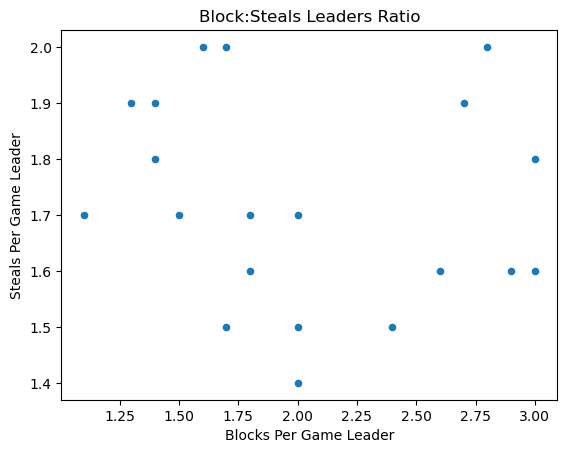

In [70]:
# Show a sctterplot of the team leaders in blocks and steals across NBA Champions.
champ_defense_chart = champ_defense.plot(
    kind='scatter',
    x= 'Blocks Per Game',
    y= 'Steals Per Game',
    title='Block:Steals Leaders Ratio',
    xlabel='Blocks Per Game Leader',
    ylabel='Steals Per Game Leader',
    )

# Print and save findings.
plt.show
plt.savefig("Saved Images/Blocks to Steals Ratio.png", bbox_inches='tight')

Steals Per Game   -0.145679
Blocks Per Game    1.000000
Name: Blocks Per Game, dtype: float64


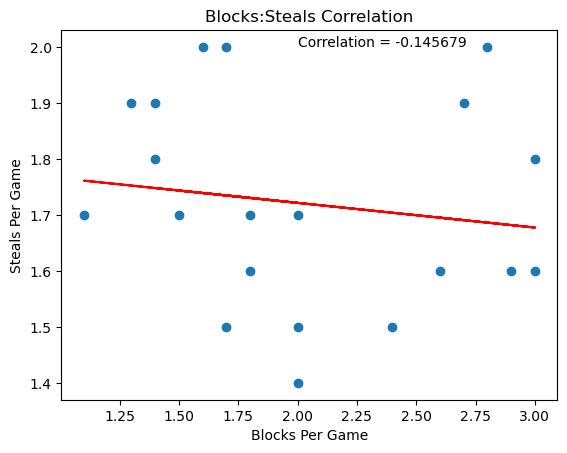

In [71]:
#Find and show the line of regression and the correlation between the two stats. 
x_values = champ_defense['Blocks Per Game']
y_values = champ_defense['Steals Per Game']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Blocks:Steals Correlation')
plt.text(2,2,'Correlation = -0.145679')
plt.xlabel('Blocks Per Game')
plt.ylabel('Steals Per Game')
plt.show
# Print and save findings.
cor = champ_defense.corr()
plt.savefig("Saved Images/Blocks to Steals Correlation.png", bbox_inches='tight')
print(cor['Blocks Per Game'])